<a href="https://colab.research.google.com/github/shallynagfase9/Data-Science-Assignments/blob/main/Exploratory_Data_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.
"""
pH - Affects the taste, stability, and color of wine. Optimal pH levels are critical for good quality.
Alcohol - Affects the body, flavor, and warmth of the wine. Higher alcohol content generally correlates with higher perceived quality.
Sulphates - Helps enhance flavors and acts as an antimicrobial agent. Proper levels are necessary for quality and preservation.
Volatile acidity - High levels can lead to an unpleasant vinegar taste, thus negatively impacting wine quality.
Chlorides - Can affect the taste and longevity. High levels may indicate poor quality.
Citric acid - Enhances the flavor and stability of wine. Moderate levels are often favorable.

"""


In [ ]:
"""
Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.
"""

"""
Removing Rows with Missing Values:
Advantages:
Simple and quick to implement.
Ensures no biases are introduced by imputed values.
Disadvantages:
Can lead to significant data loss, especially if many rows have missing values.
May remove important data points, leading to reduced model performance.

Mean/Median Imputation:
Description: Replace missing values with the mean or median of the corresponding feature.
Advantages:
Simple and fast to implement.
Works well if the data is normally distributed (mean) or has outliers (median).
Disadvantages:
Ignores the relationships between features.
Can reduce variability in the data, leading to biased models.

Mode Imputation:
Description: Replace missing values with the mode (most frequent value) of the feature.
Advantages:
Useful for categorical data.
Simple to implement.
Disadvantages:
Ignores relationships between features.
Can lead to bias if the mode is not representative of the missing values.
"""

In [ ]:
# Q3. What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?
"""
Key Factors Affecting Students' Performance
Socio-economic Status:

Parental Education: Higher parental education levels often correlate with better student performance.
Parental Income: Financial stability can provide better learning resources.
School-related Factors:

School Quality: Access to quality teachers, facilities, and learning materials.
Class Size: Smaller class sizes may lead to more individualized attention.
Student-related Factors:

Attendance: Regular attendance is crucial for consistent learning.
Health and Nutrition: Good health and proper nutrition are fundamental for cognitive function and concentration.


Analyzing Factors Using Statistical Techniques
Data Collection
Data Preprocessing
EDA
Statistical Techniques
ML Techniques
Interpretation and Reporting

"""

In [ ]:
# Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?
"""
Feature engineering is a crucial step in preparing data for a machine learning model. It involves creating, selecting, and transforming variables (features) to improve the performance and interpretability of the model.


Steps in Feature Engineering:
Understanding the Data
Data Cleaning
Feature Selection
Feature Transformation
Creating New Features

"""

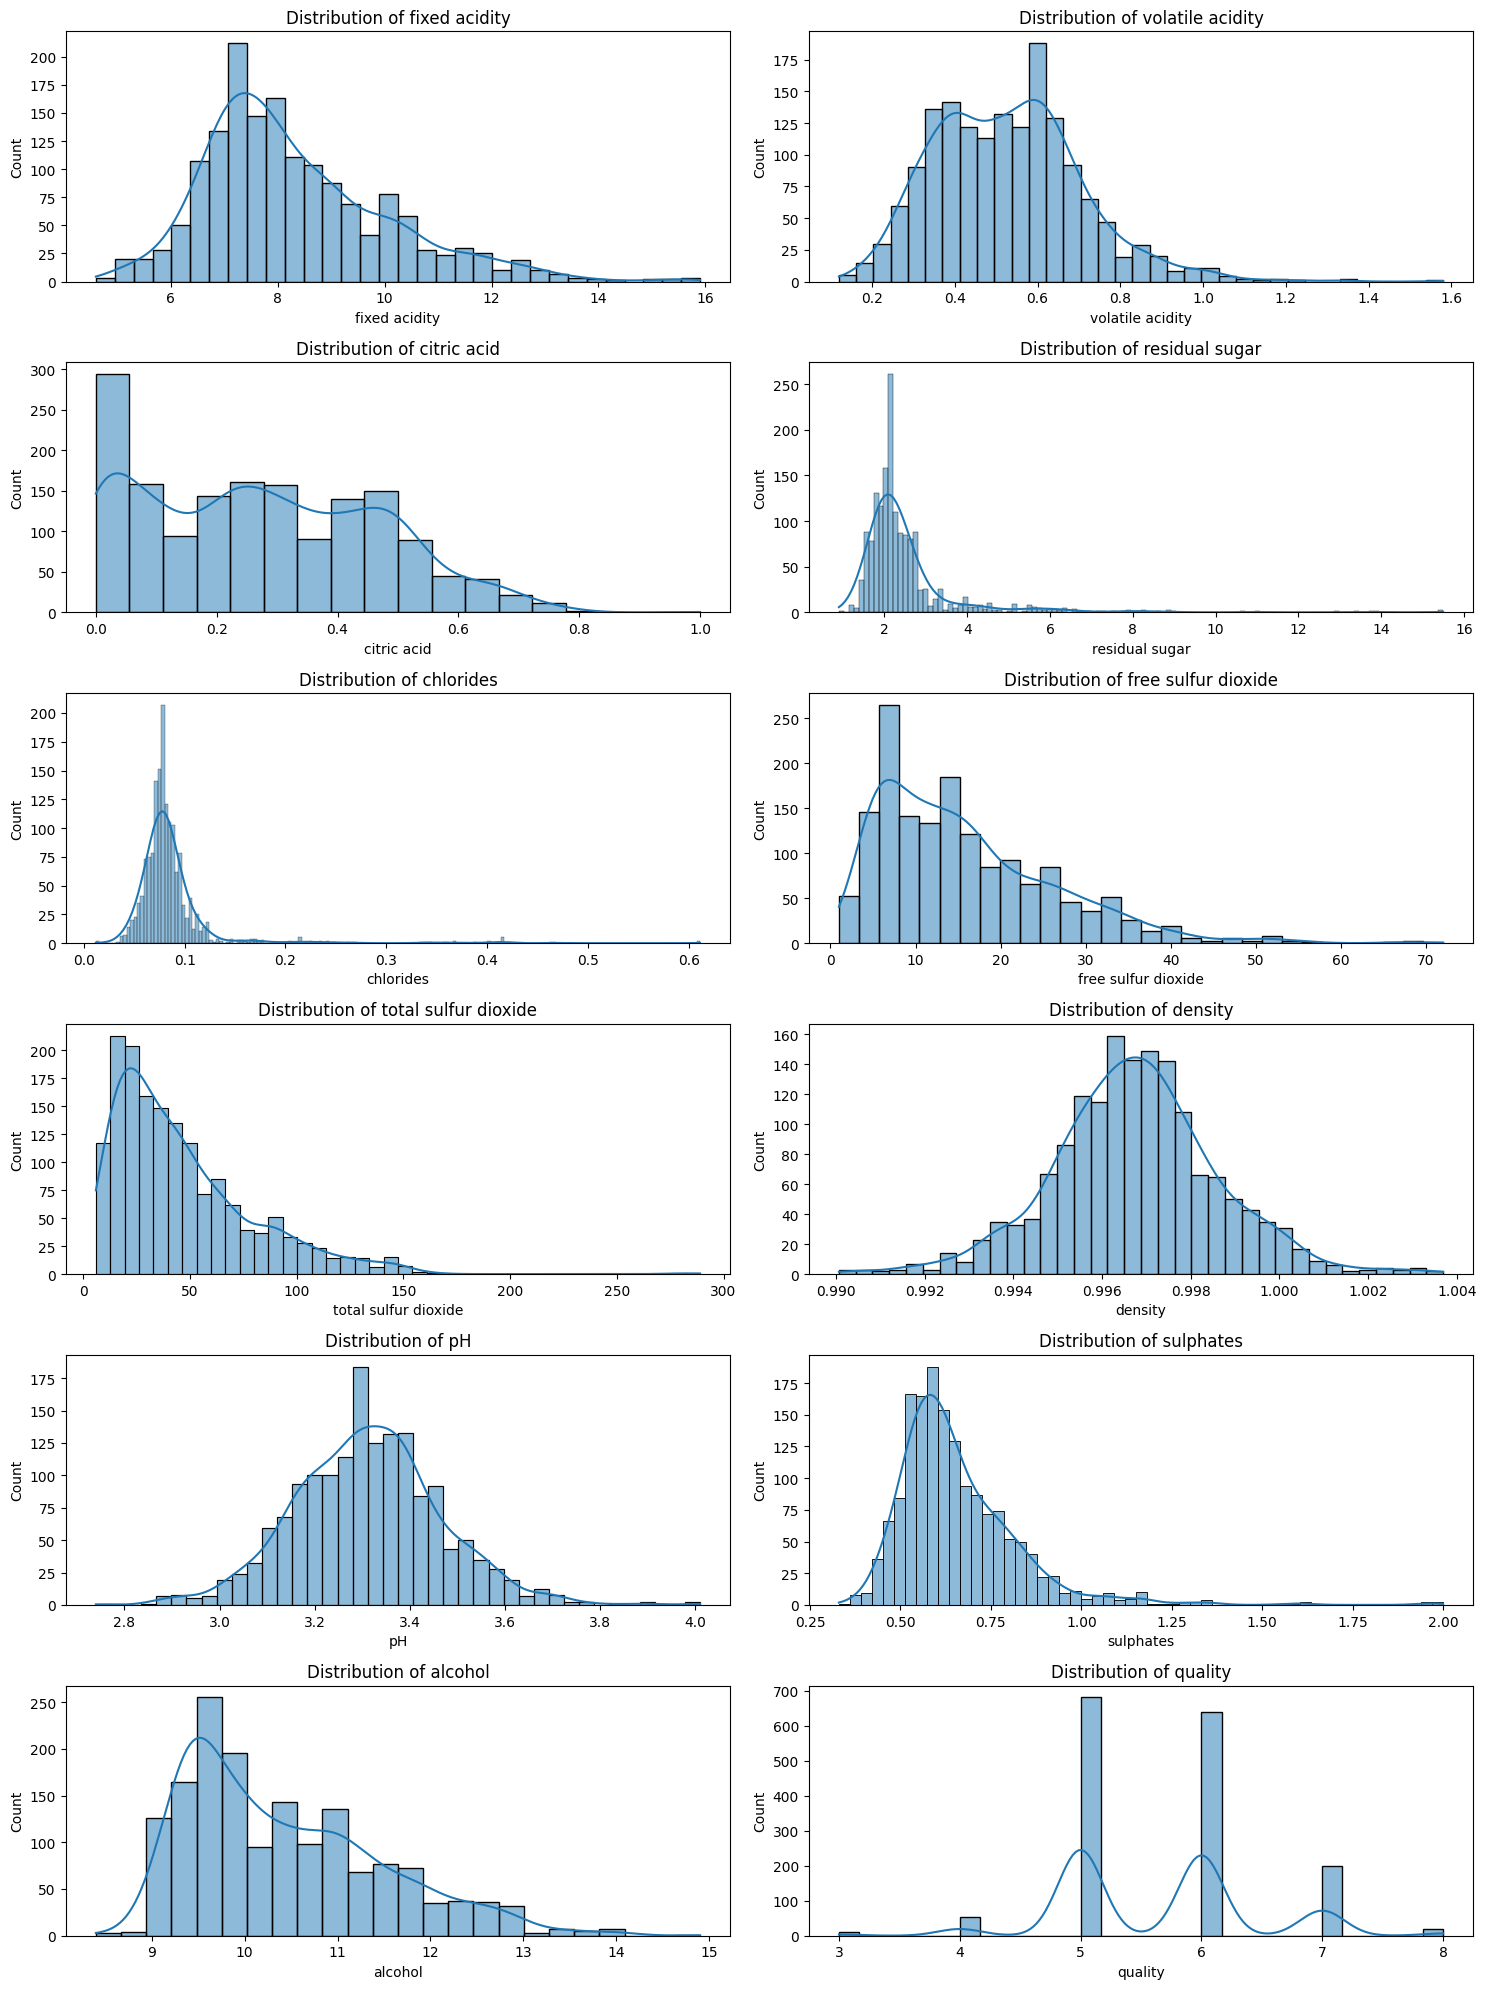

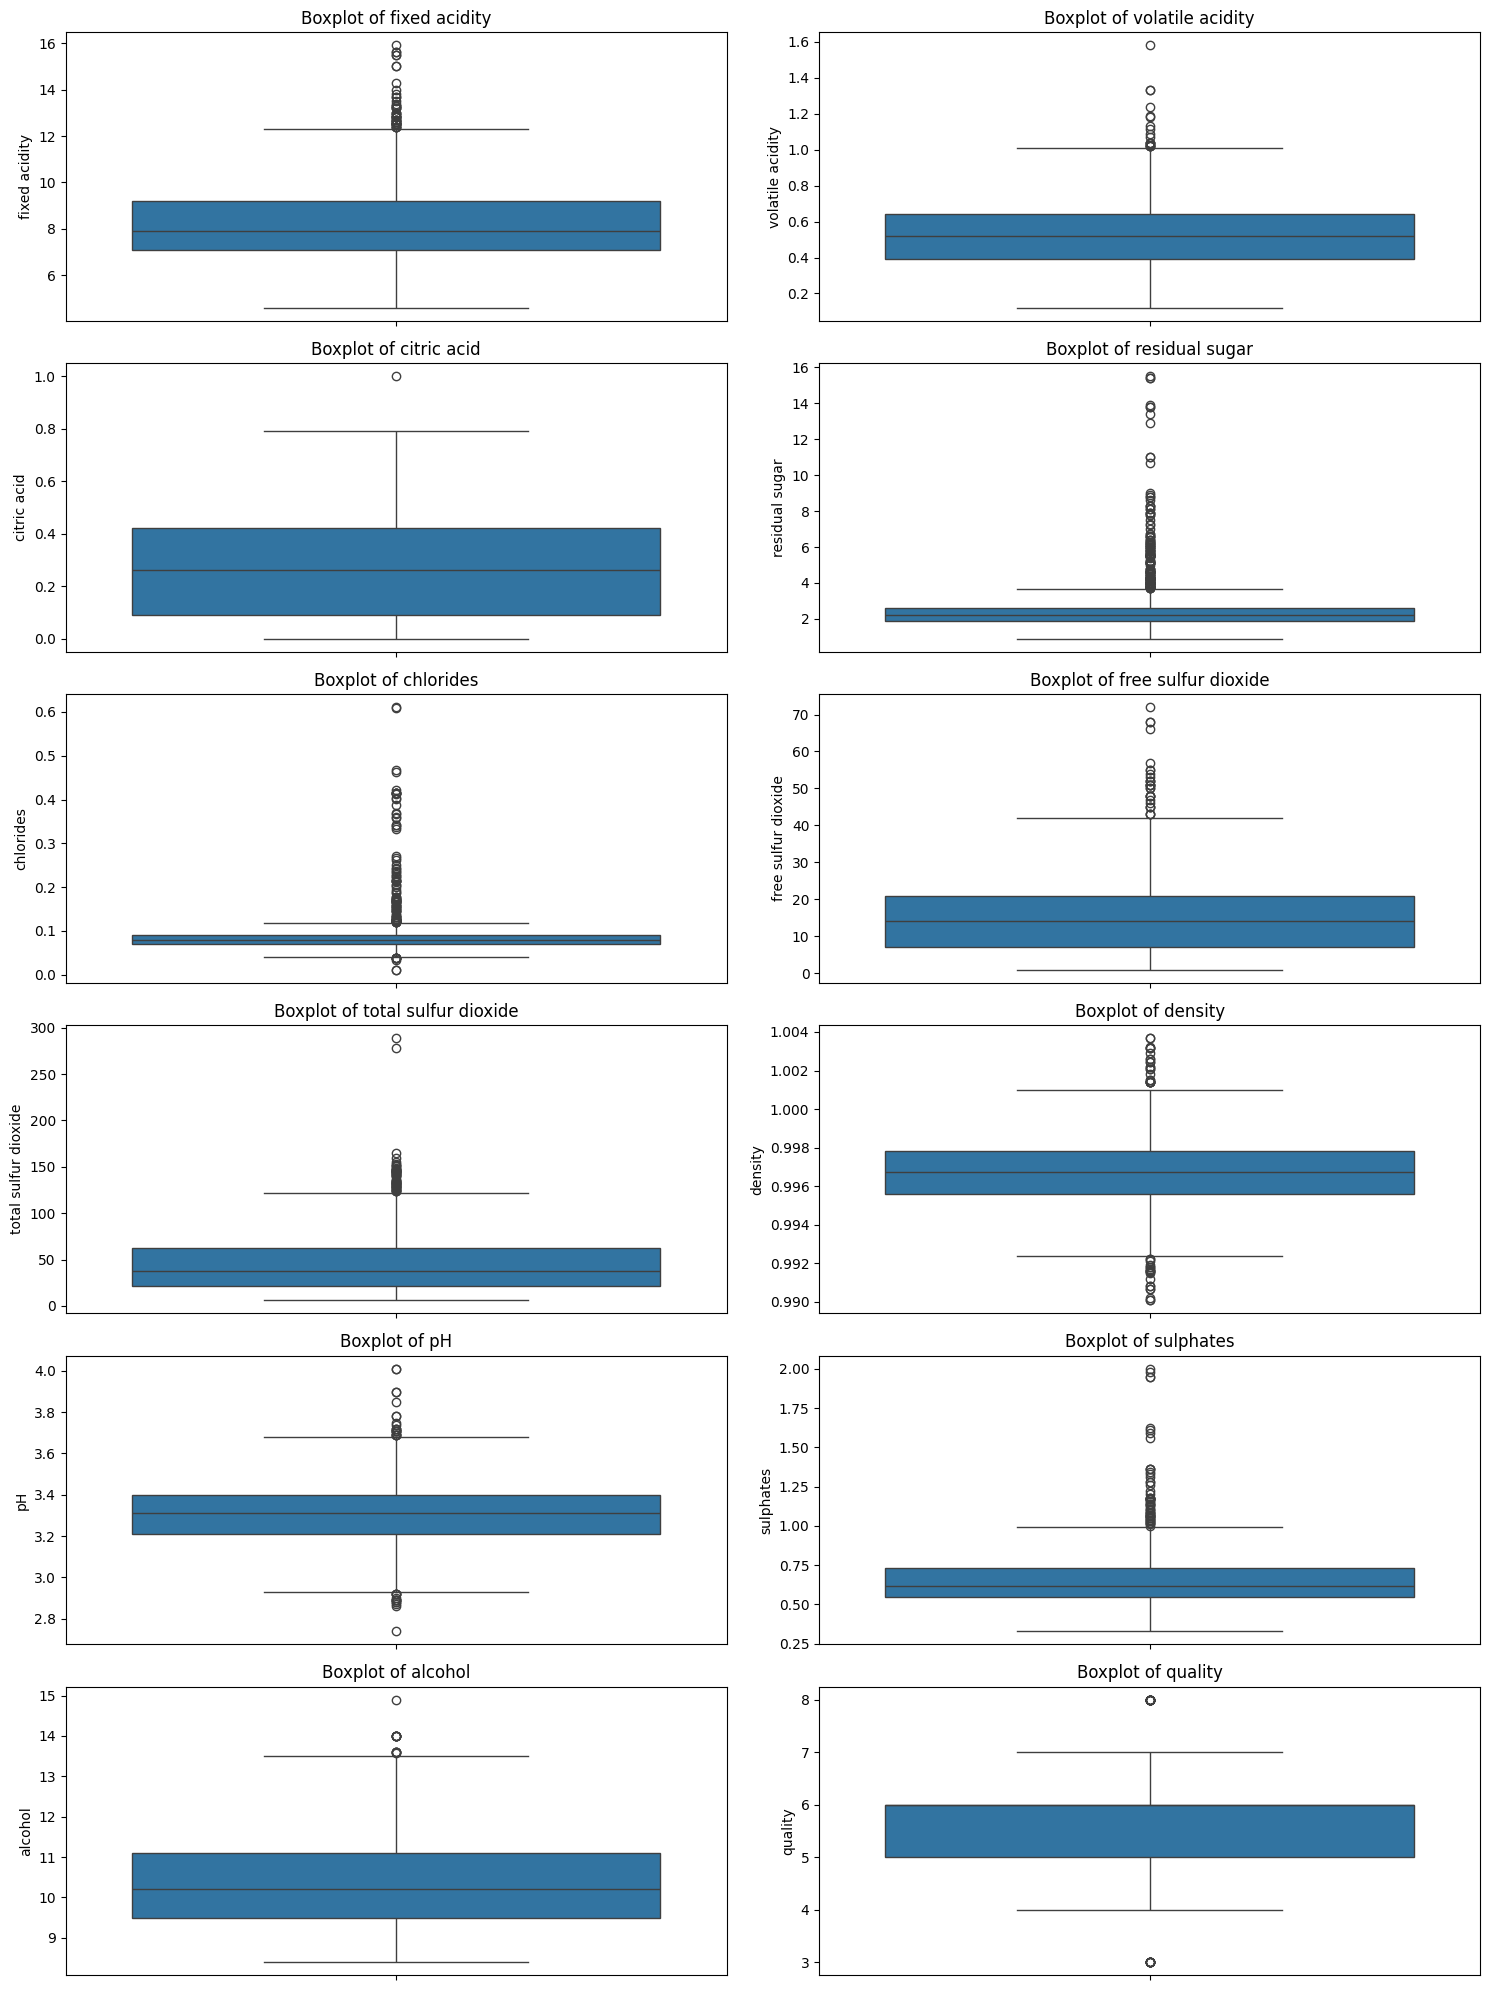

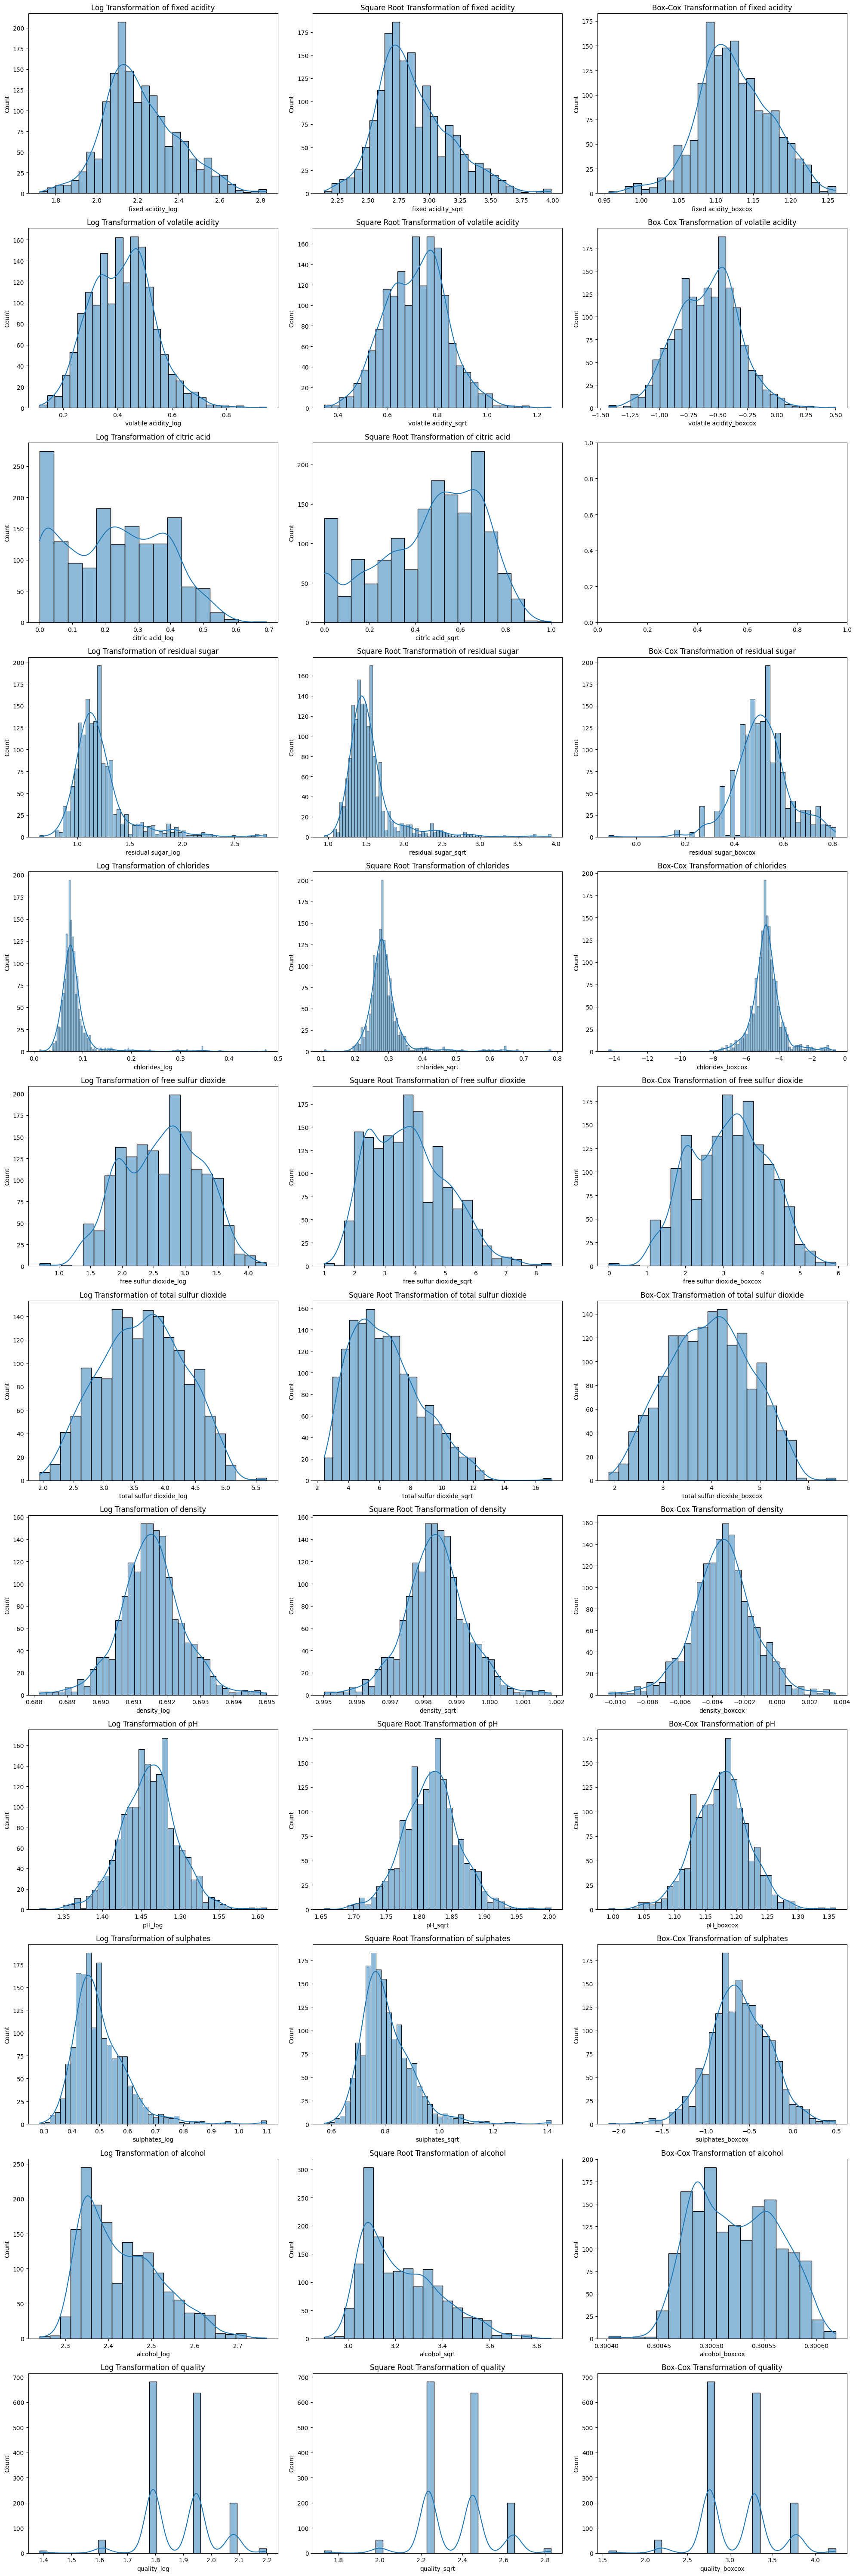

In [2]:
"""
Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?
"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, boxcox

# Load the dataset
data = pd.read_csv('/content/winequality-red.csv')  # Use the correct path to your dataset

# Summary statistics
summary_stats = data.describe()

# Plot histograms and boxplots
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
axs = axs.flatten()
for i, col in enumerate(data.columns):
    sns.boxplot(y=data[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Normality test
normality_results = {}
for col in data.columns:
    stat, p_value = shapiro(data[col])
    normality_results[col] = p_value

# Identify non-normal features (p < 0.05 indicates non-normality)
non_normal_features = [col for col, p in normality_results.items() if p < 0.05]

# Apply transformations and plot the distributions again
for col in non_normal_features:
    data[f'{col}_log'] = np.log1p(data[col])  # log(1 + x) to handle zero values
    data[f'{col}_sqrt'] = np.sqrt(data[col])
    if (data[col] > 0).all():  # Box-Cox requires all positive values
        data[f'{col}_boxcox'], _ = boxcox(data[col])

# Plot histograms for transformed features
fig, axs = plt.subplots(nrows=len(non_normal_features), ncols=3, figsize=(20, len(non_normal_features) * 5))
axs = axs.flatten()
for i, col in enumerate(non_normal_features):
    sns.histplot(data[f'{col}_log'], kde=True, ax=axs[i*3])
    axs[i*3].set_title(f'Log Transformation of {col}')
    sns.histplot(data[f'{col}_sqrt'], kde=True, ax=axs[i*3+1])
    axs[i*3+1].set_title(f'Square Root Transformation of {col}')
    if f'{col}_boxcox' in data.columns:
        sns.histplot(data[f'{col}_boxcox'], kde=True, ax=axs[i*3+2])
        axs[i*3+2].set_title(f'Box-Cox Transformation of {col}')
plt.tight_layout()
plt.show()


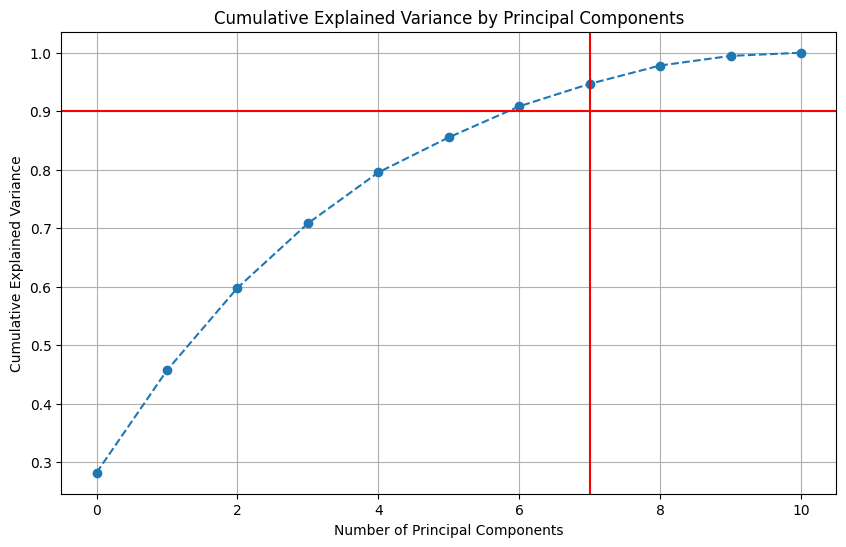

7

In [3]:
"""
Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?
"""
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/winequality-red.csv')  # Use the correct path to your dataset

# Separate features and target variable
X = data.drop('quality', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=np.argmax(cumulative_variance >= 0.90) + 1, color='r', linestyle='-')
plt.show()

# Find the number of components required to explain 90% of the variance
num_components_90_variance = np.argmax(cumulative_variance >= 0.90) + 1
num_components_90_variance
